In [1]:
%load_ext autoreload

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import uncertainties as unc
from uncertainties import unumpy as unp
import numpy as np
from sys import path
import pandas as pd

path.append('../pylib')
path.append('..')
from emc import *
from targets import mc_target_df

%autoreload 2
%aimport emc

In [4]:
server = 'seaquel.physics.illinois.edu'
analysis_schema = 'user_dannowitz_mc_tracked'
mc_schema_list = ['mc_drellyan_LH2_M013_S002',
                  'mc_drellyan_LD2_M013_S002',
                  'mc_drellyan_C_M013_S002']
analysis_table = 'mc_tracked_analysis'
fresh_start = False
#fresh_start = True

In [5]:
dimuon_df = get_dimuon_df(server=server, 
                          analysis_schema=analysis_schema, 
                          source_schema_list=mc_schema_list,
                          analysis_table=analysis_table,
                          fresh_start=fresh_start,
                          tracked_mc=True)

In [6]:
dimuon_df.head()

,dx,dy,dz,dpx,dpy,dpz,mass,xF,xB,xT,...,px2,py2,pz2,targetPos,weight,dpt,pt1,pt2,target,weight_sq
0,0.492204,-0.283410,-167.290474,0.472603,1.118025,86.463378,7.748206,0.465411,0.717875,0.378281,...,-2.960150,1.575561,64.140088,1,0.000021,1.213809,3.463111,3.353339,LH2,4.376284e-10
1,-0.141913,-0.465873,-159.622676,0.735936,-0.343088,87.875972,5.427140,0.630209,0.728035,0.183911,...,-0.962435,-2.455897,53.065765,1,0.000258,0.811980,2.710798,2.637747,LH2,6.676547e-08
2,0.335350,0.208475,-139.389786,-0.180593,-1.336224,92.778198,5.450138,0.679596,0.768558,0.182537,...,-2.695914,-0.907887,61.411165,1,0.000135,1.348373,2.551531,2.844681,LH2,1.822526e-08
3,0.149769,0.241947,-193.851255,1.012935,-0.250931,79.677556,4.225663,0.581507,0.659812,0.128243,...,-1.332268,-0.836445,48.270456,1,0.001447,1.043553,2.417189,1.573079,LH2,2.092633e-06
4,0.164867,0.033036,-108.346786,0.658107,0.327504,100.573837,6.581773,0.747115,0.833416,0.233660,...,-2.124008,-0.469705,78.306586,1,0.000007,0.735094,2.894081,2.175324,LH2,5.459304e-11


In [7]:
dimuon_df.to_csv('dimuon_tracked_mc_M013_S002.tsv', sep='\t')

In [ ]:
dimuon_df = pd.read_csv('dimuon_mc_M013_S002.tsv', sep='\t', index_col='Unnamed: 0')

In [16]:
#bin_edges = [0.08, 0.14, 0.16, 0.18, 0.21, 0.25, 0.31, 0.53]
bin_edges = [i*0.08 for i in range(1,8)]; bin_edges

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56]

In [113]:
emc_df, means_list, means_df = emc_analysis(dimuon_df,
                                            None,
                                            (),
                                            bin_edges,
                                            qie_correction=False,
                                            tracked_mc=True)

In [114]:
emc_df

,xT,D/H,C/D,C/H
"(0.08, 0.16]",0.134+/-0.017,1.202+/-0.015,1.007+/-0.012,1.210+/-0.015
"(0.16, 0.24]",0.200+/-0.023,1.186+/-0.011,0.993+/-0.010,1.178+/-0.011
"(0.24, 0.32]",0.279+/-0.023,1.031+/-0.011,0.983+/-0.010,1.013+/-0.011
"(0.32, 0.40]",0.358+/-0.023,0.872+/-0.011,0.964+/-0.012,0.840+/-0.010
"(0.40, 0.48]",0.436+/-0.023,0.733+/-0.012,0.959+/-0.016,0.703+/-0.012
"(0.48, 0.56]",0.513+/-0.022,0.702+/-0.019,0.966+/-0.027,0.678+/-0.019


In [115]:
emc_df.to_csv('emc_tracked_mc_M013_S002.tsv', sep='\t')

In [46]:
emc_df = pd.read_csv('emc_mc_M013_S002.tsv', sep='\t',
                     index_col='Unnamed: 0')
emc_df[['C/D', 'C/H', 'D/H']] = emc_df[['C/D', 'C/H', 'D/H']].applymap(unc.ufloat_fromstr)

In [116]:
bin_centers = unp.nominal_values(emc_df['xT'].values)
lower_val = np.subtract(bin_centers,bin_edges[:-1])
upper_val = np.subtract(bin_edges[1:], bin_centers)
asymmetric_bars = [lower_val, upper_val]

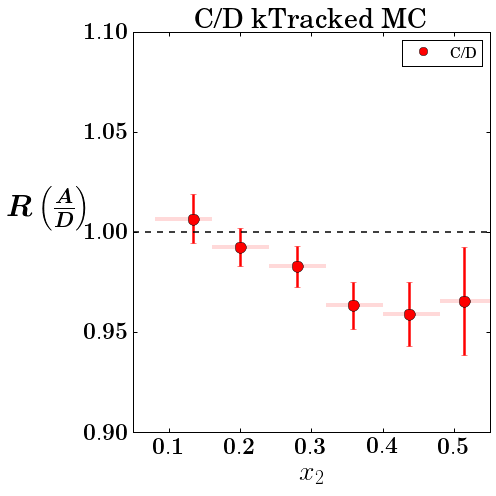

In [119]:
plot_one_emc(bin_centers, asymmetric_bars,
             [emc_df['C/D']],
             [r'C/D'], 
             lims=(0.05, 0.55, 0.9, 1.1),
             title='C/D kTracked MC',
             savefile='c-ktracked-mc.png')

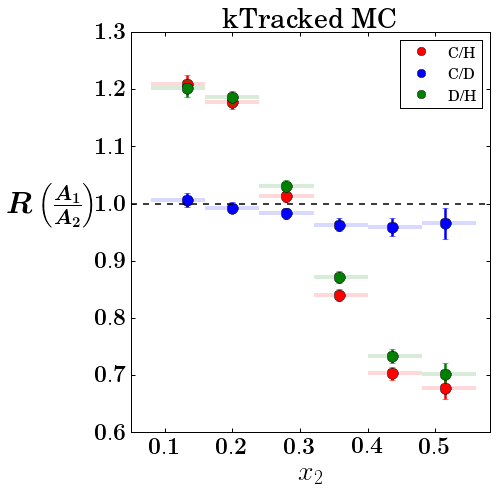

In [131]:
plot_one_emc(bin_centers, asymmetric_bars,
             [emc_df['C/H'], emc_df['C/D'], emc_df['D/H']],
             [r'C/H', r'C/D', r'D/H'], 
             lims=(0.05, 0.58, 0.6, 1.3),
             title='kTracked MC',
             savefile='c-d-h-ktracked-mc.png',
             ylabel=r'$\boldsymbol{R\left(\frac{A_1}{A_2}\right)}$')

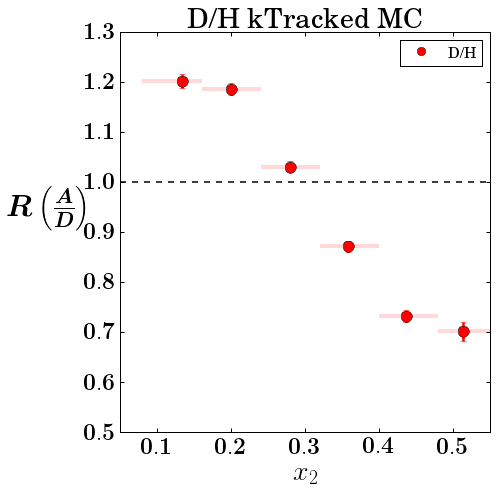

In [124]:
plot_one_emc(bin_centers, asymmetric_bars,
             [emc_df['D/H']],
             [r'D/H'], 
             lims=(0.05, 0.55, 0.5, 1.3),
             title='D/H kTracked MC',
             savefile='d-h-ktracked-mc.png')